# IDS Model Based on ANN 'MLPClassifier'

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# Dataset Importation

In [98]:
dataset=pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

In [100]:
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
columns=dataset.columns
columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

# Columns Selection

In [28]:
x,y=dataset[[' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',]],dataset[columns[-1]]

In [29]:
from sklearn.preprocessing import MinMaxScaler


# Normalisation

In [30]:
# normalisation
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.neural_network import  MLPClassifier

# Data Spliting

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled ,  y ,  test_size=0.25 , random_state=42)

In [34]:
x_test.shape

(42592, 11)

In [35]:
from sklearn.metrics import accuracy_score

In [46]:
x=[]
y=[]

Activation Function:Logistic sigmoid

# Training With One Layer 

In [47]:
# avec une seule couche
clf1 = MLPClassifier(hidden_layer_sizes=(8, ), activation='logistic', alpha=1e-4,
                    solver='lbfgs', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=False, max_iter=5000)

clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
print('score='+str(accuracy_score(y_test,y_pred1))) 
x.append('One Neural')
y.append(accuracy_score(y_test,y_pred1))

score=0.9865937265214124


# Training With Two Layers

In [48]:
# avec deux couches
clf2 = MLPClassifier(hidden_layer_sizes=(8, 16), activation='logistic', alpha=1e-4,
                    solver='lbfgs', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=False)

clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
print('score='+str(accuracy_score(y_test,y_pred2)))
x.append('Two Neurals')
y.append(accuracy_score(y_test,y_pred2))

score=0.9867345980465815


# Training With Three Layers

In [76]:
# avec trois couche
clf3 = MLPClassifier(hidden_layer_sizes=(8, 16, 30), activation='logistic', alpha=1e-4,
                    solver='lbfgs', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=False, max_iter=5000)

clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
print('score='+str(accuracy_score(y_test,y_pred3)))
x.append('Three Neurals')
y.append(accuracy_score(y_test,y_pred3))

score=0.9867345980465815


# performance evaluation

# Accuracy Score

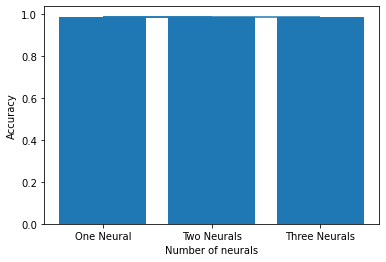

In [50]:
plt.bar(x,y)
plt.xlabel('Number of neurals')
plt.ylabel('Accuracy')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i])
plt.show()

# Confusion Matrix

In [89]:
from sklearn.metrics import plot_confusion_matrix

One Layer

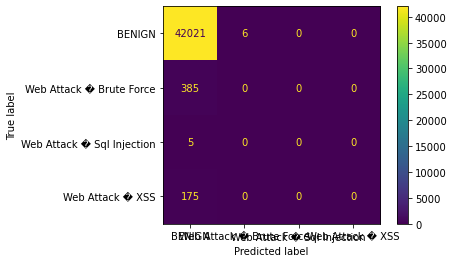

In [61]:
plot_confusion_matrix(clf1,x_test,y_test)
plt.show()

Two layers

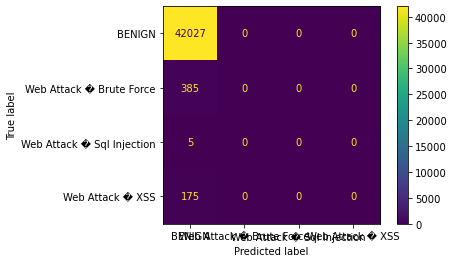

In [62]:
plot_confusion_matrix(clf2,x_test,y_test)
plt.show()

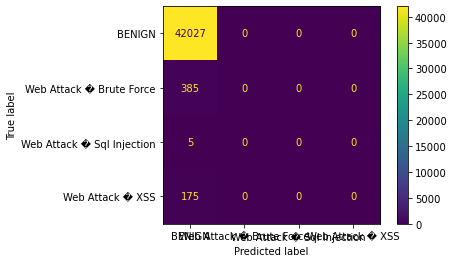

In [63]:
plot_confusion_matrix(clf3,x_test,y_test)
plt.show()

# Testing in Other Dataset

# Data importation

In [82]:
dataset1=pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')

In [83]:
xt,yt=dataset1[[' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',]],dataset1[columns[-1]]

# Normalisation

In [84]:
xt_scaled=mms.fit_transform(xt)

# Performance

In [85]:
print('Accuracy with one Layer:',accuracy_score(clf1.predict(xt),yt)*100)
print('Accuracy with Two Layers:',accuracy_score(clf2.predict(xt),yt)*100)
print('Accuracy with Three Layers:',accuracy_score(clf3.predict(xt),yt)*100)

Accuracy with one Layer: 98.94782576832274
Accuracy with Two Layers: 98.9708584380709
Accuracy with Three Layers: 98.9708584380709


Confusion Matrix with one Layer:


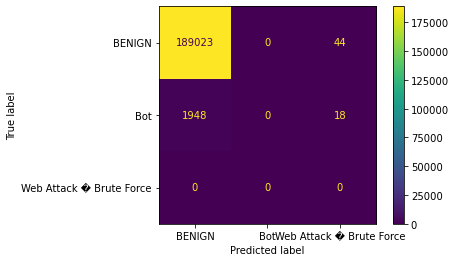

In [93]:
print('Confusion Matrix with one Layer:')
plot_confusion_matrix(clf1,xt,yt)

Confusion Matrix with Two Layers:


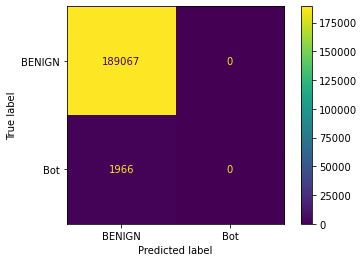

In [94]:
print('Confusion Matrix with Two Layers:')
plot_confusion_matrix(clf2,xt,yt)

Confusion Matrix with Three Layers:


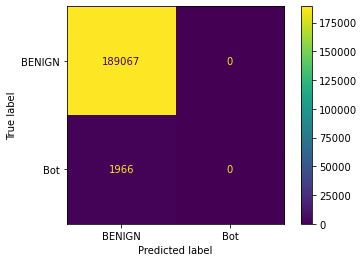

In [95]:
print('Confusion Matrix with Three Layers:')
plot_confusion_matrix(clf3,xt,yt)